In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
file_path="../county_election_results.csv"
df_elecciones = pd.read_csv(file_path)

In [4]:
df_elecciones.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [5]:
df_elecciones

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2000,votes_2004,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,9559,10520,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,15092,16693,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,20285,24135,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,11756,12875,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,11103,12269,11693,10859,12040,NaN,NaN,2197,9466,1.043854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3107,56041,100,0,2020-11-03,FIPSCode,presidential,WY,R,7496,...,7418,8081,8418,8539,8470,NaN,NaN,1202,6154,1.102479
3108,3108,56003,100,0,2020-11-03,FIPSCode,presidential,WY,R,4806,...,4918,5283,5341,5324,5317,NaN,NaN,604,4067,1.074666
3109,3109,56023,100,0,2020-11-03,FIPSCode,presidential,WY,R,8643,...,6845,7914,8615,8618,8875,NaN,NaN,1105,6779,1.170704
3110,3110,56031,100,0,2020-11-03,FIPSCode,presidential,WY,R,3898,...,4373,4574,4597,4531,4529,NaN,NaN,719,3437,1.082358


Existen condados con el mismo nombre para diferentes Estados

In [6]:
duplicados = df_elecciones.duplicated(subset=["county", "state"])
print(duplicados.any())

True


Análisis exploratorio.

In [7]:
def generar_histograma(columna, titulo, x_label, y_label, bins=10,tipo="bar",edge_color="darkblue",fill_color="lightblue",add_line=50):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.hist(columna, bins=bins, ec=edge_color, histtype=tipo, fc=fill_color)
    ax.set_title(titulo)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if add_line:
        ax.axvline(x=add_line,ls=":",color="gray")

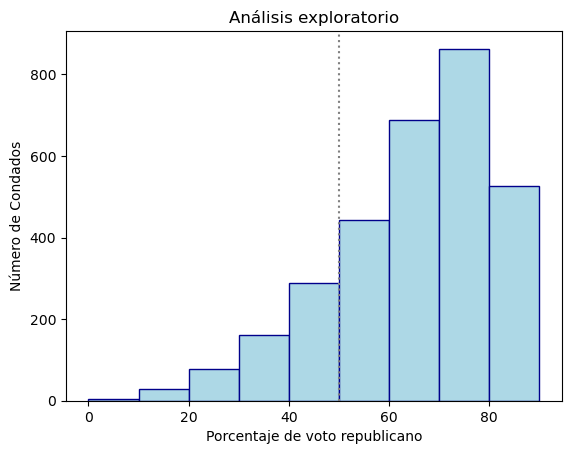

In [8]:
votos_totales=  df_elecciones["votes_total_2020"]
votos_objetivo=df_elecciones["votes_R_2020"]
porcentage_votos= votos_objetivo/votos_totales*100
bins = np.arange(0, 100, 10)
generar_histograma(porcentage_votos,"Análisis exploratorio", "Porcentaje de voto republicano", "Número de Condados", bins=bins)


In [9]:
numero_condados_republicanos = df_elecciones[porcentage_votos >=50]
numero_condados_democratas = df_elecciones[porcentage_votos < 50]
print(len(numero_condados_republicanos),len(numero_condados_democratas),len(votos_totales))

2552 560 3112


Aquí podemos ver que el conteo de condados en el que gana un partido analizado por su porcentage varía si analizamos el rpeublicano y luego el demócrata, y esto ocurre porque nos falta considerar el third_party que aunque sea mínimo igual afecta al cálculo porcentual. De todos modos igual la diferencia es mínima, pero es un punto que hay que tener en consideración al trbajar con porcentages.

In [10]:
votos_segundo=df_elecciones['votes_D_2020']
votos_third=df_elecciones['votes_third_party_2020']
porcentage_votos_segundo= votos_segundo/votos_totales*100
porcentage_votos_third= votos_third/votos_totales*100
porcentage_total=porcentage_votos+porcentage_votos_segundo+porcentage_votos_third
porcentage_inexacto=porcentage_total[porcentage_total<100].unique()
print(porcentage_inexacto[0],porcentage_inexacto[1])

99.99999999999999 99.99999999999997


Se recomienda usar un número de bins igual a la raiz cuadrada del número total de datos.

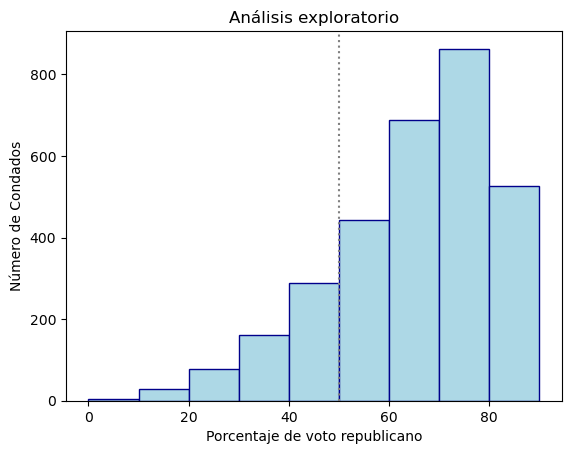

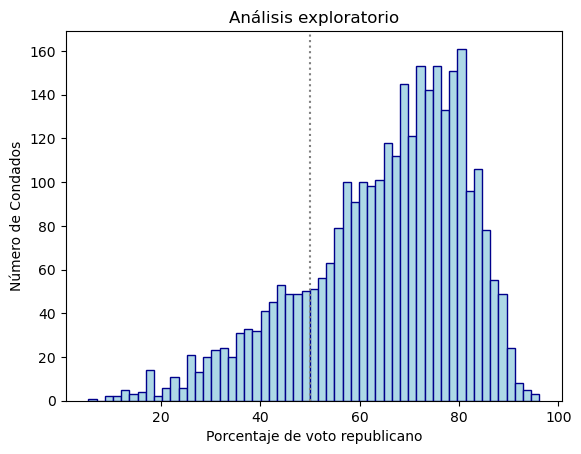

In [11]:
bins = np.arange(0, 100, 10)
generar_histograma(
    porcentage_votos,
    "Análisis exploratorio",
    "Porcentaje de voto republicano",
    "Número de Condados",
    bins=bins,
)
bins = int(np.sqrt(len(porcentage_votos)))
generar_histograma(
    porcentage_votos,
    "Análisis exploratorio",
    "Porcentaje de voto republicano",
    "Número de Condados",
    bins=bins,
)

### Función de distribución acumulada empírica FDAe

In [12]:
def generar_distribucion_acumulada(x, y, x_label, y_label, pos_line=50):
    plt.plot(x, y, marker=".", ls="none")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if pos_line>=0:
        plt.axvline(x=pos_line, ls=":", color="gray")

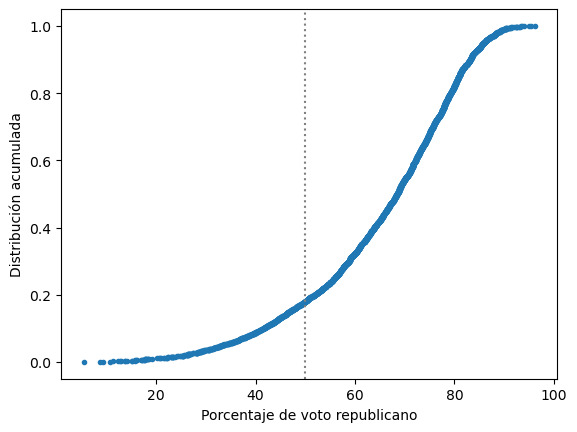

In [13]:
n = len(df_elecciones)
x = np.sort(porcentage_votos)
y = np.arange(1, len(x) + 1) / len(x)
generar_distribucion_acumulada(x, y, "Porcentaje de voto republicano", "Distribución acumulada")

La función dde distribución acumulada nos indicará en este caso el porcentage de condados en el que el partido republicano obtuvo un porcentage mayor a 50%. En este caso vemos que el partido republicano ganó en casi el 80% de los condados.

In [18]:
def generar_distribuciones_acumuladas(datos,labels, x_label, y_label, pos_line=50):
    for index,dato in enumerate(datos):
        x=np.sort(dato)
        y=np.arange(1,len(x)+1)/len(x)
        plt.plot(x, y, marker=".", ls="none", label=labels[index])
        plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.axvline(x=pos_line, ls=":", color="gray")

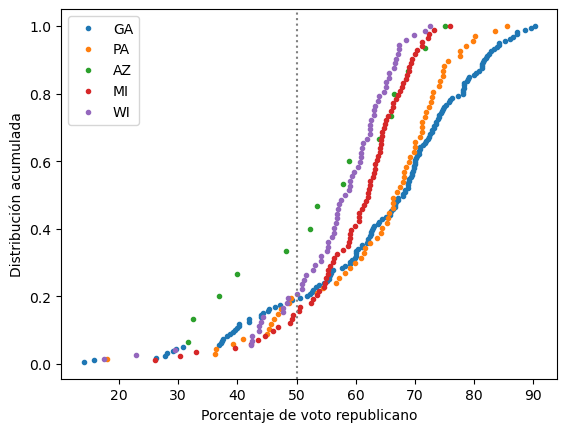

In [23]:

estados = [
    "GA",
    "PA",
    "AZ",
    "MI",
    "WI",
]
estados_elecciones = df_elecciones["state"]
datos = []
for state in estados:
    dats = porcentage_votos[estados_elecciones == state]
    datos.append(dats)
generar_distribuciones_acumuladas(datos,estados, "Porcentaje de voto republicano", "Distribución acumulada")


Los histogramas suelen ser efectivos para ver un resumen estadístico de los datos, pero podría ser mejor si consideramos algunos indicadores como la covarianza o el coeficiente de Pearson.

En el caso de usar numpy para el cálculo de la covarianza o el coeficiente de pearson, recordar que estos devuelven una matriz de nxn, donde n es el número de variables, en este caso como estamos analizando 2 variables, la matriz será de 2x2.
La posición 0,1 y 1,0 de la matriz de covarianza nos dará la covarianza entre las variables, y la posición 0,0 y 1,1 nos dará la varianza de cada variable consigo misma.

[[29879.9266622  -1516.85993272]
 [-1516.85993272   159.0840228 ]]
Covarianza: -1516.8599327153165
[[ 1.         -0.69573273]
 [-0.69573273  1.        ]]
Pearson: -0.6957327285839192


Text(0, 0.5, 'Porcentaje de voto republicano')

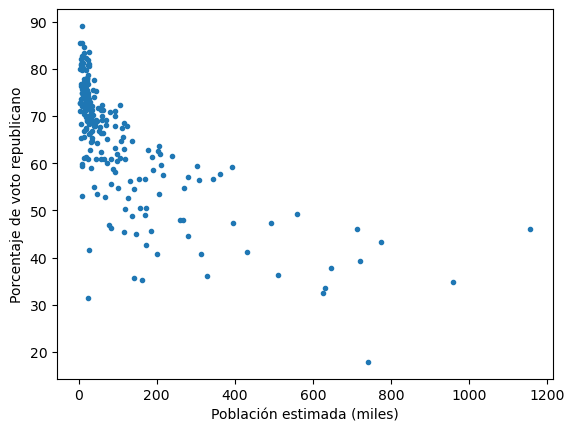

In [28]:
# Análisis de covarianza: % votos demócratas y cantidad total de votantes en swing states
swing = ["PA", "OH", "FL"]
df_elecciones['porcentage_votos_objetivo']=porcentage_votos
dat_swing = df_elecciones[estados_elecciones.isin(swing)]

x = dat_swing["votes_total_2020"] / 1000
y = dat_swing["porcentage_votos_objetivo"]

cov = np.cov(x, y)
print(cov)
print("Covarianza:", cov[0, 1])

pearson = np.corrcoef(x, y)
print(pearson)
print("Pearson:", pearson[0, 1])

# scatter plot:
plt.plot(x, y, ".")
plt.xlabel("Población estimada (miles)")
plt.ylabel("Porcentaje de voto republicano")

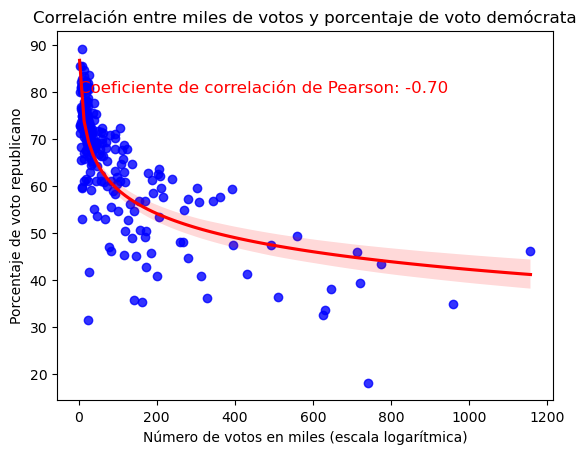

In [32]:
import seaborn as sns

swing = ["PA", "OH", "FL"]
dat_swing = df_elecciones[df_elecciones["state"].isin(swing)]

x = dat_swing["votes_total_2020"] / 1000
y = dat_swing["porcentage_votos_objetivo"]

cov = np.cov(x, y)
pearson = np.corrcoef(x, y)

sns.regplot(
    x=x, y=y,logx=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"}
)
plt.xlabel("Número de votos en miles (escala logarítmica)")
plt.ylabel("Porcentaje de voto republicano")
plt.title("Correlación entre miles de votos y porcentaje de voto demócrata")
plt.text(
    1,
    80,
    f"Coeficiente de correlación de Pearson: {pearson[0,1]:.2f}",
    fontsize=12,
    color="red",
)
plt.show()

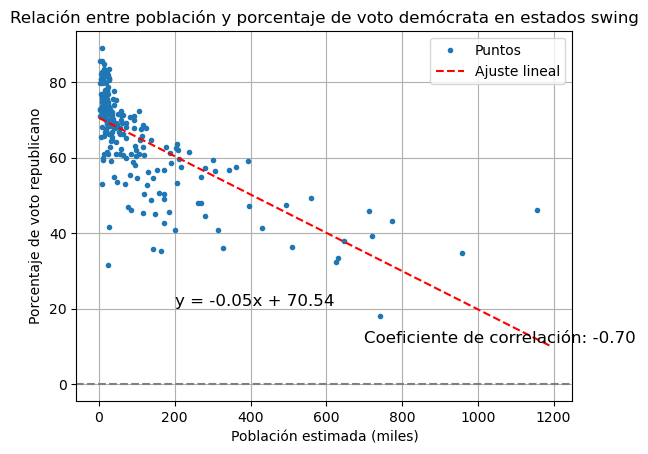

In [34]:
# Ajuste lineal y gráfico de dispersión
a, b = np.polyfit(x, y, 1)
xf = np.arange(0, 1200, 10)
yf = a * xf + b
plt.plot(x, y, ".", label="Puntos")
plt.plot(xf, yf, "--", color="red", label="Ajuste lineal")

# Título, leyenda y etiquetas de los ejes
plt.title("Relación entre población y porcentaje de voto demócrata en estados swing")
plt.xlabel("Población estimada (miles)")
plt.ylabel("Porcentaje de voto republicano")
plt.legend()

# Coeficiente de correlación
pearson = np.corrcoef(x, y)[0, 1]
plt.text(
    700,
    10,
    f"Coeficiente de correlación: {pearson:.2f}",
    fontsize=12,
    ha="left",
    va="bottom",
)
plt.axhline(y=0, color="gray", linestyle="--")

# Ecuación de la recta
plt.text(200, 20, f"y = {a:.2f}x + {b:.2f}", fontsize=12, ha="left", va="bottom")

# Cuadrícula de fondo
plt.grid(True)

# Mostrar el gráfico
plt.show()